In [4]:
from polyase import *
import pandas as pd
import polars as pl 
import RNApysoforms as RNApy

In [5]:
import plotly
plotly.offline.init_notebook_mode()

# Running Polyase on tetraploid potato sample 

## Required Files

Files necessary for this tutorial are deposited on Zenodo ([DOI link here]()):

- **Syntelog finder output**: To assign genes based on syntelogous relationships
- **Oarfish directory**: Contains transcript quantification data
- **GFF file (liftoff annotation)**: Genome annotation from liftoff
- **GFF file (novel transcripts)**: Novel identified transcripts
- **Functional gene annotation**: Gene functional annotations

## Installation of polyase 


You can install polyase using pip:
```bash
pip install polyase
```


## 1) Reading in the data 

In this section we will read in the data genespace output file, transcript quanitfication directory, tx2gene. 

In [6]:
out_dir_syntelogfinder = "/scratch/nadjafn/potato-allelic-orthogroups/output_atlantic_liftoff"
out_dir_long_read_quant = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff"

In [7]:
# File with syntelog categories from SyntelogFinder
var_obs_file = f"{out_dir_syntelogfinder}/genespace/unitato2Atl.no_scaffold.no_hap0_genespace_categories.tsv"
# Directory of gene counts from oarfish generated by long-read quantification pipeline
gene_counts_dir = f"{out_dir_long_read_quant}/oarfish/"
tx2gene = f"{out_dir_long_read_quant}/custom/combined.tx2gene.tsv"

## Dataset Information

**Source**: [Citation/DOI from the paper]

**Organism**: *Solanum tuberosum* cv. Atlantic (tetraploid)

**Experimental Design**:
- **10 samples** total from cultivar Atlantic
- **2 tissues**: Leaf and tuber
- **Biological replicates**: 5 samples per tissue type
- **Sequencing**: Long-read RNA-seq (ONT)
- **Quantification**: Oarfish transcript-level counts

**Sample Information**:

| Sample ID    | Tissue | Description |
|--------------|--------|-------------|
| SRR14993892  | Leaf   | Replicate 1 |
| SRR14993893  | Leaf   | Replicate 2 |
| SRR14993894  | Leaf   | Replicate 3 |
| SRR14993895  | Leaf   | Replicate 4 |
| SRR14996168  | Leaf   | Replicate 5 |
| SRR14995031  | Tuber  | Replicate 1 |
| SRR14995032  | Tuber  | Replicate 2 |
| SRR14995033  | Tuber  | Replicate 3 |
| SRR14995034  | Tuber  | Replicate 4 |
| SRR14995933  | Tuber  | Replicate 5 |

In [8]:
# Define sample IDs and their conditions
sample_info = {
    "SRR14993892": "leaf",
    "SRR14993893": "leaf",
    "SRR14993894": "leaf",
    "SRR14993895": "leaf",
    "SRR14996168": "leaf",
    "SRR14995031": "tuber",
    "SRR14995032": "tuber",
    "SRR14995033": "tuber",
    "SRR14995034": "tuber",
    "SRR14995933": "tuber"
} 

# With isoforms
allelic_data = load_ase_data(
    var_obs_file=var_obs_file,
    sample_info=sample_info,
    tx_to_gene_file=tx2gene,
    isoform_counts_dir=gene_counts_dir,
    quant_dir=gene_counts_dir
)

Loading metadata files...


Loading counts for 10 samples in parallel...
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Successfully loaded 10 out of 10 samples
Concatenating count matrices...
Creating isoform metadata...
Adding var_obs annotations for 250224 transcripts...
Found 167997 genes with var_obs annotations
Found 33730 genes without var_obs annotations (will be filled with NaN)
Assigning Synt_id values...
Assigned Synt_id values for 33730 genes (41291 transcripts)
Keeping all 250224 transcripts from expression data
Statistics:
  - Total transcripts: 250224
  - Transcripts with gene_id annotation: 250224
  - Transcripts with var_obs data: 208933
  - Transcripts with NaN var_obs data: 41291
  - Transcripts with existing Synt_id

In [9]:
allelic_data.var.head()

transcript_id                  gene_id  \
Soltu.DM.01G022610.1.Hap4  Soltu.DM.01G022610.1.Hap4  Soltu.DM.01G022610.Hap4   
Soltu.DM.08G015840.1.Hap3  Soltu.DM.08G015840.1.Hap3  Soltu.DM.08G015840.Hap3   
BambuTx7480                                     None           BambuGene19318   
Soltu.DM.12G014030.1.Hap3                       None  Soltu.DM.12G014030.Hap3   
Soltu.DM.10G029100.1.Hap3  Soltu.DM.10G029100.1.Hap3  Soltu.DM.10G029100.Hap3   

                          feature_type        Synt_id  \
Soltu.DM.01G022610.1.Hap4   transcript   Synt_id_2810   
Soltu.DM.08G015840.1.Hap3   transcript  Synt_id_46958   
BambuTx7480                 transcript              1   
Soltu.DM.12G014030.1.Hap3   transcript              2   
Soltu.DM.10G029100.1.Hap3   transcript  Synt_id_55785   

                                       synteny_category  \
Soltu.DM.01G022610.1.Hap4  1hap1_1hap2_2hap3_1hap4_no_s   
Soltu.DM.08G015840.1.Hap3     1hap1_1hap2_1hap3_0hap4_s   
BambuTx7480                                        None   
Soltu.DM.12G014030.1.Hap3                          None   
Soltu.DM.10G029100.1.Hap3     1hap1_1hap2_1hap3_1hap4_s   

                                                              syntenic_genes  \
Soltu.DM.01G022610.1.Hap4  Soltu.DM.01G022610.1.Hap1,Soltu.DM.01G022610.1...   
Soltu.DM.08G015840.1.Hap3  Soltu.DM.08G015840.1.Hap1,Soltu.DM.08G015840.1...   
BambuTx7480                                                             None   
Soltu.DM.12G014030.1.Hap3                                               None   
Soltu.DM.10G029100.1.Hap3  Soltu.DM.10G029100.1.Hap1,Soltu.DM.10G029100.1...   

                          haplotype CDS_length_category  \
Soltu.DM.01G022610.1.Hap4      hap4                 NaN   
Soltu.DM.08G015840.1.Hap3      hap3                 NaN   
BambuTx7480                    None                None   
Soltu.DM.12G014030.1.Hap3      None                None   
Soltu.DM.10G029100.1.Hap3      hap3  less_1%_difference   

                          CDS_haplotype_with_longest_annotation  
Soltu.DM.01G022610.1.Hap4                                   NaN  
Soltu.DM.08G015840.1.Hap3                                   NaN  
BambuTx7480                                                None  
Soltu.DM.12G014030.1.Hap3                                  None  
Soltu.DM.10G029100.1.Hap3                         equal_lengths

In [10]:
allelic_data.obs.head()

condition  em_lib_size  unique_lib_size  ambig_lib_size  \
SRR14993894      leaf    6524167.0          3596141         8846994   
SRR14993893      leaf     711674.0           409917          905189   
SRR14993892      leaf    1314624.0           791265         1518961   
SRR14993895      leaf    3207895.0          1914658         3787858   
SRR14995033     tuber    3108348.0          2088492         2699295   

             total_lib_size  
SRR14993894        12443135  
SRR14993893         1315106  
SRR14993892         2310226  
SRR14993895         5702516  
SRR14995033         4787787

### Add annotation

For interpretation of results we add functional gene annotations from an additional file to the adata.var

In [11]:
# Load functional annotation data
annotation_file = "/scratch/nadjafn/reference/ADAPT_liftoff/Phureja_v4-v6.1_translations.xlsx"
df_annotation = pd.read_excel(annotation_file)
df_annotation = df_annotation.iloc[:, 1:3]
df_annotation.columns = ['gene_id_unitato', 'functional_annotation']

# Remove version suffix from gene IDs (e.g., "GENE.1" -> "GENE")
allelic_data.var['gene_id_unitato'] = allelic_data.var['gene_id'].str.rsplit('.', n=1).str[0]
allelic_data.var['original_index'] = allelic_data.var.index

# Merge annotations
merged_data = pd.merge(
    allelic_data.var,
    df_annotation,
    on='gene_id_unitato',
    how='left'
)

# Remove duplicates and restore index
merged_data = merged_data.drop_duplicates(subset=['original_index', 'gene_id'], keep='first')
merged_data.index = merged_data['original_index']
merged_data = merged_data.drop(columns=['original_index'])

# Update AnnData object
allelic_data.var = merged_data


Let's verify whether Bambu detected any previously unannotated transcripts in our dataset.

In [12]:
allelic_data.var[allelic_data.var_names.str.startswith("Bambu")].head()

transcript_id                  gene_id  \
original_index                                                       
BambuTx7480                          None           BambuGene19318   
BambuTx6679_1   Soltu.DM.01G001250.1.Hap2  Soltu.DM.01G001250.Hap2   
BambuTx2419_5                        None              XLOC_120479   
BambuTx2031     Soltu.DM.12G012010.1.Hap4  Soltu.DM.12G012010.Hap4   
BambuTx2419_14                       None              XLOC_060525   

               feature_type        Synt_id              synteny_category  \
original_index                                                             
BambuTx7480      transcript              1                          None   
BambuTx6679_1    transcript   Synt_id_8492  1hap1_4hap2_0hap3_1hap4_no_s   
BambuTx2419_5    transcript             13                          None   
BambuTx2031      transcript  Synt_id_35143  1hap1_1hap2_1hap3_1hap4_no_s   
BambuTx2419_14   transcript             17                          None   

                                                   syntenic_genes haplotype  \
original_index                                                                
BambuTx7480                                                  None      None   
BambuTx6679_1   Soltu.DM.01G001240.1.Hap1,Soltu.DM.01G001240.1...      hap2   
BambuTx2419_5                                                None      None   
BambuTx2031     Soltu.DM.12G012010.1.Hap1,Soltu.DM.12G012010.1...      hap4   
BambuTx2419_14                                               None      None   

               CDS_length_category CDS_haplotype_with_longest_annotation  \
original_index                                                             
BambuTx7480                   None                                  None   
BambuTx6679_1                  NaN                                   NaN   
BambuTx2419_5                 None                                  None   
BambuTx2031                    NaN                                   NaN   
BambuTx2419_14                None                                  None   

                   gene_id_unitato  functional_annotation  
original_index                                             
BambuTx7480         BambuGene19318                    NaN  
BambuTx6679_1   Soltu.DM.01G001250  receptor like protein  
BambuTx2419_5          XLOC_120479                    NaN  
BambuTx2031     Soltu.DM.12G012010   hypothetical protein  
BambuTx2419_14         XLOC_060525                    NaN

In [13]:
# print specific gene info
allelic_data.var[allelic_data.var['gene_id'].str.contains("Soltu.DM.11G023050")]

transcript_id                  gene_id  \
original_index                                                                  
BambuTx3983                Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.Hap1   
Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.Hap3   
Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.Hap4   
BambuTx3983_1              Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.Hap3   
Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.Hap2   
BambuTx3983_4              Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.Hap4   
BambuTx4008_3              Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.Hap4   
BambuTx3983_2              Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.Hap2   
Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.Hap1   
BambuTx4008_2              Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.Hap3   
BambuTx4008_1              Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.Hap1   

                          feature_type        Synt_id  \
original_index                                          
BambuTx3983                 transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap3   transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap4   transcript  Synt_id_59067   
BambuTx3983_1               transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap2   transcript  Synt_id_59067   
BambuTx3983_4               transcript  Synt_id_59067   
BambuTx4008_3               transcript  Synt_id_59067   
BambuTx3983_2               transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap1   transcript  Synt_id_59067   
BambuTx4008_2               transcript  Synt_id_59067   
BambuTx4008_1               transcript  Synt_id_59067   

                                    synteny_category  \
original_index                                         
BambuTx3983                1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap3  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap4  1hap1_1hap2_1hap3_1hap4_s   
BambuTx3983_1              1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap2  1hap1_1hap2_1hap3_1hap4_s   
BambuTx3983_4              1hap1_1hap2_1hap3_1hap4_s   
BambuTx4008_3              1hap1_1hap2_1hap3_1hap4_s   
BambuTx3983_2              1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap1  1hap1_1hap2_1hap3_1hap4_s   
BambuTx4008_2              1hap1_1hap2_1hap3_1hap4_s   
BambuTx4008_1              1hap1_1hap2_1hap3_1hap4_s   

                                                              syntenic_genes  \
original_index                                                                 
BambuTx3983                Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx3983_1              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx3983_4              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx4008_3              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx3983_2              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx4008_2              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx4008_1              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   

                          haplotype CDS_length_category  \
original_index                                            
BambuTx3983                    hap1  less_1%_difference   
Soltu.DM.11G023050.1.Hap3      hap3  less_1%_difference   
Soltu.DM.11G023050.1.Hap4      hap4  less_1%_difference   
BambuTx3983_1                  hap3  less_1%_difference   
Soltu.DM.11G023050.1.Hap2      hap2  less_1%_difference   
BambuTx3983_4                  hap4  less_1%_difference   
B

Now we will aggregate transcript-level counts to gene-level counts for allele-specific expression analysis. Unique counts are just summed. For ambgious counts we take the mean, under the asseumption that multimapping between transcripts of the same gene to other genes is similar.

In [14]:
# Usage
adata_gene = aggregate_transcripts_to_genes(allelic_data)

# Check the result
print(adata_gene)


Aggregating 250224 transcripts to 201727 genes
Created gene-level AnnData: 10 × 201727
Average transcripts per gene: 1.24
AnnData object with n_obs × n_vars = 10 × 201727
    obs: 'condition', 'em_lib_size', 'unique_lib_size', 'ambig_lib_size', 'total_lib_size'
    var: 'gene_id', 'feature_type', 'transcript_id', 'Synt_id', 'synteny_category', 'syntenic_genes', 'haplotype', 'CDS_length_category', 'CDS_haplotype_with_longest_annotation', 'functional_annotation', 'n_transcripts'
    layers: 'unique_counts', 'ambiguous_counts', 'em_counts', 'em_cpm', 'unique_cpm', 'ambiguous_cpm'


## 2) Gene-level analysis

### Filter low expressed genes

In [15]:
#CPM threshold (automatically normalized)
adata_gene_filtered = filter_low_expressed_genes(
    adata_gene,
    min_expression=20.0,  # 20 count per million
    lib_size_normalization='cpm',
    mode= 'all',
    #library_size_dependent=True,
    verbose=True)

Using uniform threshold: 20.0
Filtered out 87575 groups
Kept 6996 / 201727 items


### Calculate allelic ratios and multimapping ratios

In [16]:
allelic_data_filtered = calculate_allelic_ratios(adata_gene_filtered , 'unique_counts')
allelic_data_filtered = calculate_allelic_ratios(adata_gene_filtered , 'em_counts')
allelic_data_filtered = calculate_multi_ratios(adata_gene_filtered, 'unique_counts', 'ambiguous_counts')

In [17]:
allelic_data_filtered

AnnData object with n_obs × n_vars = 10 × 6996
    obs: 'condition', 'em_lib_size', 'unique_lib_size', 'ambig_lib_size', 'total_lib_size', 'lib_size'
    var: 'gene_id', 'feature_type', 'transcript_id', 'Synt_id', 'synteny_category', 'syntenic_genes', 'haplotype', 'CDS_length_category', 'CDS_haplotype_with_longest_annotation', 'functional_annotation', 'n_transcripts', 'multimapping_ratio'
    layers: 'unique_counts', 'ambiguous_counts', 'em_counts', 'em_cpm', 'unique_cpm', 'ambiguous_cpm', 'allelic_ratio_unique_counts', 'allelic_ratio_em_counts'

### Plotting of allelic ratios for quality control

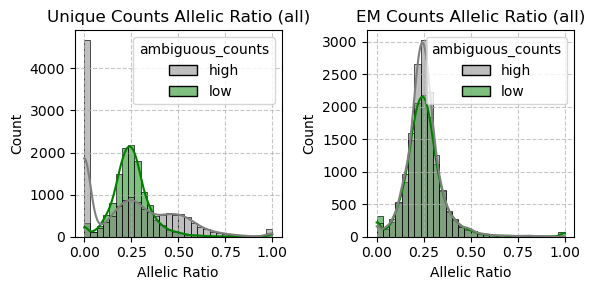

In [18]:
fig = plot_allelic_ratios(
    allelic_data_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="both",
    figsize = (6,3),
    kde = True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)


Most genes exhibit balanced allelic expression, with ratios clustering around 0.25. Some genes display extreme ratios, which may represent biologically meaningful patterns or annotation artifacts. Applying a multimapping filter reduces noise from genes with high ambiguous read counts. We will exclude genes showing length differences, as these can introduce bias into the results.

In [19]:
high_bias = allelic_data_filtered [:,(allelic_data_filtered.var['multimapping_ratio'] < 0.25) & (allelic_data_filtered  .layers['allelic_ratio_unique_counts'] > 0.8).all(axis=0) & (allelic_data_filtered .var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") ]

high_bias.var

gene_id feature_type  \
Soltu.DM.06G031650.Hap4  Soltu.DM.06G031650.Hap4         gene   
Soltu.DM.02G000560.Hap4  Soltu.DM.02G000560.Hap4         gene   
Soltu.DM.04G000950.Hap4  Soltu.DM.04G000950.Hap4         gene   
Soltu.DM.05G025890.Hap3  Soltu.DM.05G025890.Hap3         gene   
Soltu.DM.08G021320.Hap4  Soltu.DM.08G021320.Hap4         gene   
Soltu.DM.06G028650.Hap4  Soltu.DM.06G028650.Hap4         gene   
Soltu.DM.06G032940.Hap4  Soltu.DM.06G032940.Hap4         gene   
Sotub01g012860.Hap2          Sotub01g012860.Hap2         gene   

                                     transcript_id        Synt_id  \
Soltu.DM.06G031650.Hap4  Soltu.DM.06G031650.1.Hap4  Synt_id_39946   
Soltu.DM.02G000560.Hap4  Soltu.DM.02G000560.1.Hap4  Synt_id_15748   
Soltu.DM.04G000950.Hap4  Soltu.DM.04G000950.1.Hap4  Synt_id_26660   
Soltu.DM.05G025890.Hap3  Soltu.DM.05G025890.1.Hap3  Synt_id_35710   
Soltu.DM.08G021320.Hap4  Soltu.DM.08G021320.1.Hap4  Synt_id_47662   
Soltu.DM.06G028650.Hap4  Soltu.DM.06G028650.1.Hap4  Synt_id_39549   
Soltu.DM.06G032940.Hap4  Soltu.DM.06G032940.1.Hap4  Synt_id_40092   
Sotub01g012860.Hap2        Sotub01g012860.1.1.Hap2  Synt_id_11456   

                                  synteny_category  \
Soltu.DM.06G031650.Hap4  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.02G000560.Hap4  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.04G000950.Hap4  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.05G025890.Hap3  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.08G021320.Hap4  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.06G028650.Hap4  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.06G032940.Hap4  1hap1_1hap2_1hap3_1hap4_s   
Sotub01g012860.Hap2      1hap1_1hap2_1hap3_1hap4_s   

                                                            syntenic_genes  \
Soltu.DM.06G031650.Hap4  Soltu.DM.06G031650.1.Hap1,Soltu.DM.06G031650.1...   
Soltu.DM.02G000560.Hap4  Soltu.DM.02G000560.1.Hap1,Soltu.DM.02G000560.1...   
Soltu.DM.04G000950.Hap4  Soltu.DM.04G000950.1.Hap1,Soltu.DM.04G000950.1...   
Soltu.DM.05G025890.Hap3  Soltu.DM.05G025890.1.Hap1,Soltu.DM.05G025890.1...   
Soltu.DM.08G021320.Hap4  Soltu.DM.08G021320.1.Hap1,Soltu.DM.08G021320.1...   
Soltu.DM.06G028650.Hap4  Soltu.DM.06G028650.1.Hap1,Soltu.DM.06G028650.1...   
Soltu.DM.06G032940.Hap4  Soltu.DM.06G032940.1.Hap1,Soltu.DM.06G032940.1...   
Sotub01g012860.Hap2      Sotub01g012860.1.1.Hap1,Sotub01g012860.1.1.Hap...   

                        haplotype  CDS_length_category  \
Soltu.DM.06G031650.Hap4      hap4  more_20%_difference   
Soltu.DM.02G000560.Hap4      hap4   more_5%_difference   
Soltu.DM.04G000950.Hap4      hap4  more_20%_difference   
Soltu.DM.05G025890.Hap3      hap3  more_20%_difference   
Soltu.DM.08G021320.Hap4      hap4  more_20%_difference   
Soltu.DM.06G028650.Hap4      hap4  more_20%_difference   
Soltu.DM.06G032940.Hap4      hap4  more_20%_difference   
Sotub01g012860.Hap2          hap2  more_20%_difference   

                        CDS_haplotype_with_longest_annotation  \
Soltu.DM.06G031650.Hap4                                    4G   
Soltu.DM.02G000560.Hap4                                    4G   
Soltu.DM.04G000950.Hap4                                    4G   
Soltu.DM.05G025890.Hap3                                    4G   
Soltu.DM.08G021320.Hap4                                    4G   
Soltu.DM.06G028650.Hap4                                    4G   
Soltu.DM.06G032940.Hap4                                    4G   
Sotub01g012860.Hap2                                        2G   

                                              functional_annotation  \
Soltu.DM.06G031650.Hap4                                     pumilio   
Soltu.DM.02G000560.Hap4                                        None   
Soltu.DM.04G000950.Hap4                        Ribosomal protein S4   
Soltu.DM.05G025890.Hap3                     homolog of anti-oxidant   
Soltu.DM.08G021320.Hap4              conserved hypothetical protein   
Soltu.DM.06G028650.Hap4               Ribosomal L27e protein family   
Soltu.DM.06G032940.Hap4  Ribosomal pr

You can see that alleles with high expression ratios (>0.8) have big length differences. 

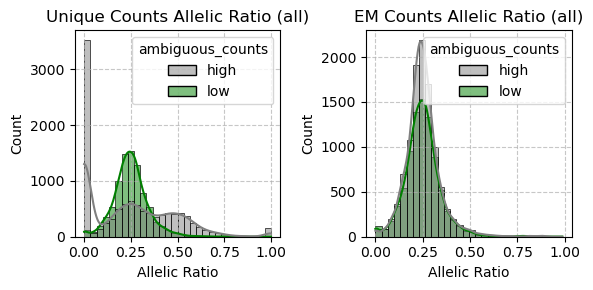

In [20]:
# filter transcripts that are not equal lengths
mask = allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths"
allelic_data_length_filtered = allelic_data_filtered[:,mask].copy()
fig = plot_allelic_ratios(
    allelic_data_length_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="both",
    figsize = (6,3),
    kde = True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)


After filtering for alleles of equal length, several of the highly biased genes are removed.

Another potential source of bias arises from unequal transcript numbers per gene. For example, a novel transcript may have been identified on only one haplotype. Therefore, we will filter to include only genes where all alleles have the same number of transcripts.

Genes with different transcript numbers across alleles: 302
Genes with equal transcript numbers across alleles: 1931


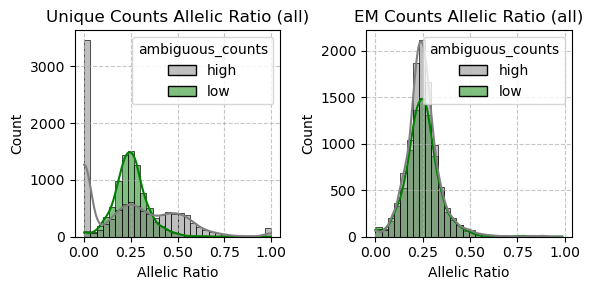

In [21]:
# Group by syntelog ID and check for equal transcript numbers across alleles
synt_ids_same_tx_number = allelic_data_filtered.var.groupby('Synt_id').aggregate({
    'n_transcripts': set
})

# Count genes with different transcript numbers before filtering
genes_diff_tx_number = synt_ids_same_tx_number[synt_ids_same_tx_number['n_transcripts'].apply(lambda x: len(x) > 1)]
print(f"Genes with different transcript numbers across alleles: {len(genes_diff_tx_number)}")

# Keep only syntelogs where all alleles have the same number of transcripts
synt_ids_same_tx_number = synt_ids_same_tx_number[synt_ids_same_tx_number['n_transcripts'].apply(lambda x: len(x) == 1)]
print(f"Genes with equal transcript numbers across alleles: {len(synt_ids_same_tx_number)}")

# Filter for equal-length transcripts with equal transcript numbers
mask = (allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & \
       (allelic_data_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))



allelic_data_length_filtered = allelic_data_filtered[:, mask].copy()

# Plot allelic ratios after filtering
fig = plot_allelic_ratios(
    allelic_data_length_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s",
    sample='all',
    ratio_type="both",
    figsize=(6, 3),
    kde=True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)

Looks much better to what we had before filtering 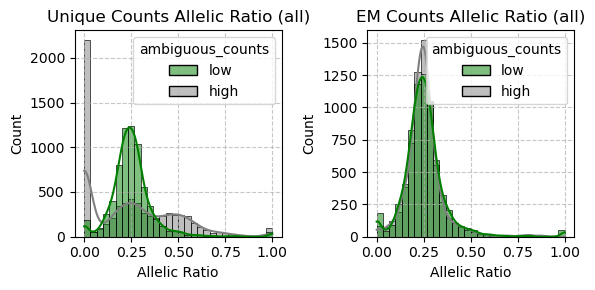

#### Get ASE results for cis for control

In [22]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask = (allelic_data_filtered.var["multimapping_ratio"] < 0.25) & (allelic_data_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") & (allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & (allelic_data_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))
allelic_data_length_filter = allelic_data_filtered[:,mask].copy()

# 1. Test for differential allelic ratios withing conditions
cis_results_control = test_allelic_ratios_within_conditions(allelic_data_length_filter, layer="unique_counts", test_condition= "leaf", inplace=True)



# 2. Get top differential syntelogs
cis_top_results = get_top_differential_syntelogs(cis_results_control, n=45, sort_by='ratio_difference', fdr_threshold=0.05, ratio_threshold=0.1)



Using CPM data from layer: unique_cpm
Processing syntelog 100/211
Processing syntelog 200/211
Found 50 from 211 syntelogs with at least one significantly different allele (FDR < 0.005 and ratio difference > 0.1)


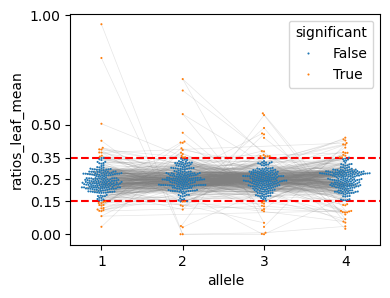

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your existing code
cis_results_control['significant'] = (cis_results_control['p_value'] < 0.05) & (cis_results_control['ratio_difference'] > 0.1)

# Add a temporary column to track original order
cis_results_control['plot_order'] = range(len(cis_results_control))

# Create the swarm plot
fig, ax = plt.subplots(figsize=(4, 3))
sns.swarmplot(y=cis_results_control['ratios_leaf_mean'], 
              x=cis_results_control['allele'], 
              hue=cis_results_control['significant'], 
              size=1.5,
              ax=ax,
              order=['1', '2', '3', '4'])

# Extract point positions from the plot
points_data = []
for collection in ax.collections:
    offsets = collection.get_offsets().data
    for x, y in offsets:
        points_data.append({'x': x, 'y': y})

# Match points to data by y-values (within tolerance)
point_positions = {}
for idx, row in cis_results_control.iterrows():
    y_val = row['ratios_leaf_mean']
    allele_idx = ['1', '2', '3', '4'].index(row['allele'])
    
    # Find matching point (closest in y-value near the correct x position)
    for point in points_data:
        if abs(point['y'] - y_val) < 0.001 and abs(point['x'] - allele_idx) < 0.5:
            if idx not in point_positions:
                point_positions[idx] = (point['x'], point['y'])
                break

# Connect paired points by Synt_id
for synt_id in cis_results_control['Synt_id'].unique():
    subset = cis_results_control[cis_results_control['Synt_id'] == synt_id]
    if len(subset) >= 2:  # Connect all points with same Synt_id
        indices = subset.index.tolist()
        valid_indices = [i for i in indices if i in point_positions]
        
        if len(valid_indices) >= 2:
            for i in range(len(valid_indices) - 1):
                x_vals = [point_positions[valid_indices[i]][0], point_positions[valid_indices[i+1]][0]]
                y_vals = [point_positions[valid_indices[i]][1], point_positions[valid_indices[i+1]][1]]
                ax.plot(x_vals, y_vals, color='gray', linewidth=0.5, alpha=0.2, zorder=0)

plt.yticks([0.0, 0.15, 0.25, 0.35, 0.5, 1.0])
plt.axhline(y=0.35, color='r', linestyle='--')
plt.axhline(y=0.15, color='r', linestyle='--')
plt.show()

In [24]:
cis_results_control['allele'].unique()

array(['4', '1', '2', '3'], dtype=object)

In [25]:
print(cis_results_control[['Synt_id', 'allele', 'ratios_leaf_mean']].head(10))

           Synt_id allele  ratios_leaf_mean
137  Synt_id_19637      4          0.272633
714  Synt_id_53205      1          0.804918
636  Synt_id_44380      4          0.053016
468  Synt_id_35878      2          0.463390
753  Synt_id_56017      3          0.109318
580  Synt_id_40655      1          0.504506
752  Synt_id_56017      2          0.548479
715  Synt_id_53205      2          0.000000
713  Synt_id_53205      3          0.000000
737  Synt_id_55638      2          0.031865


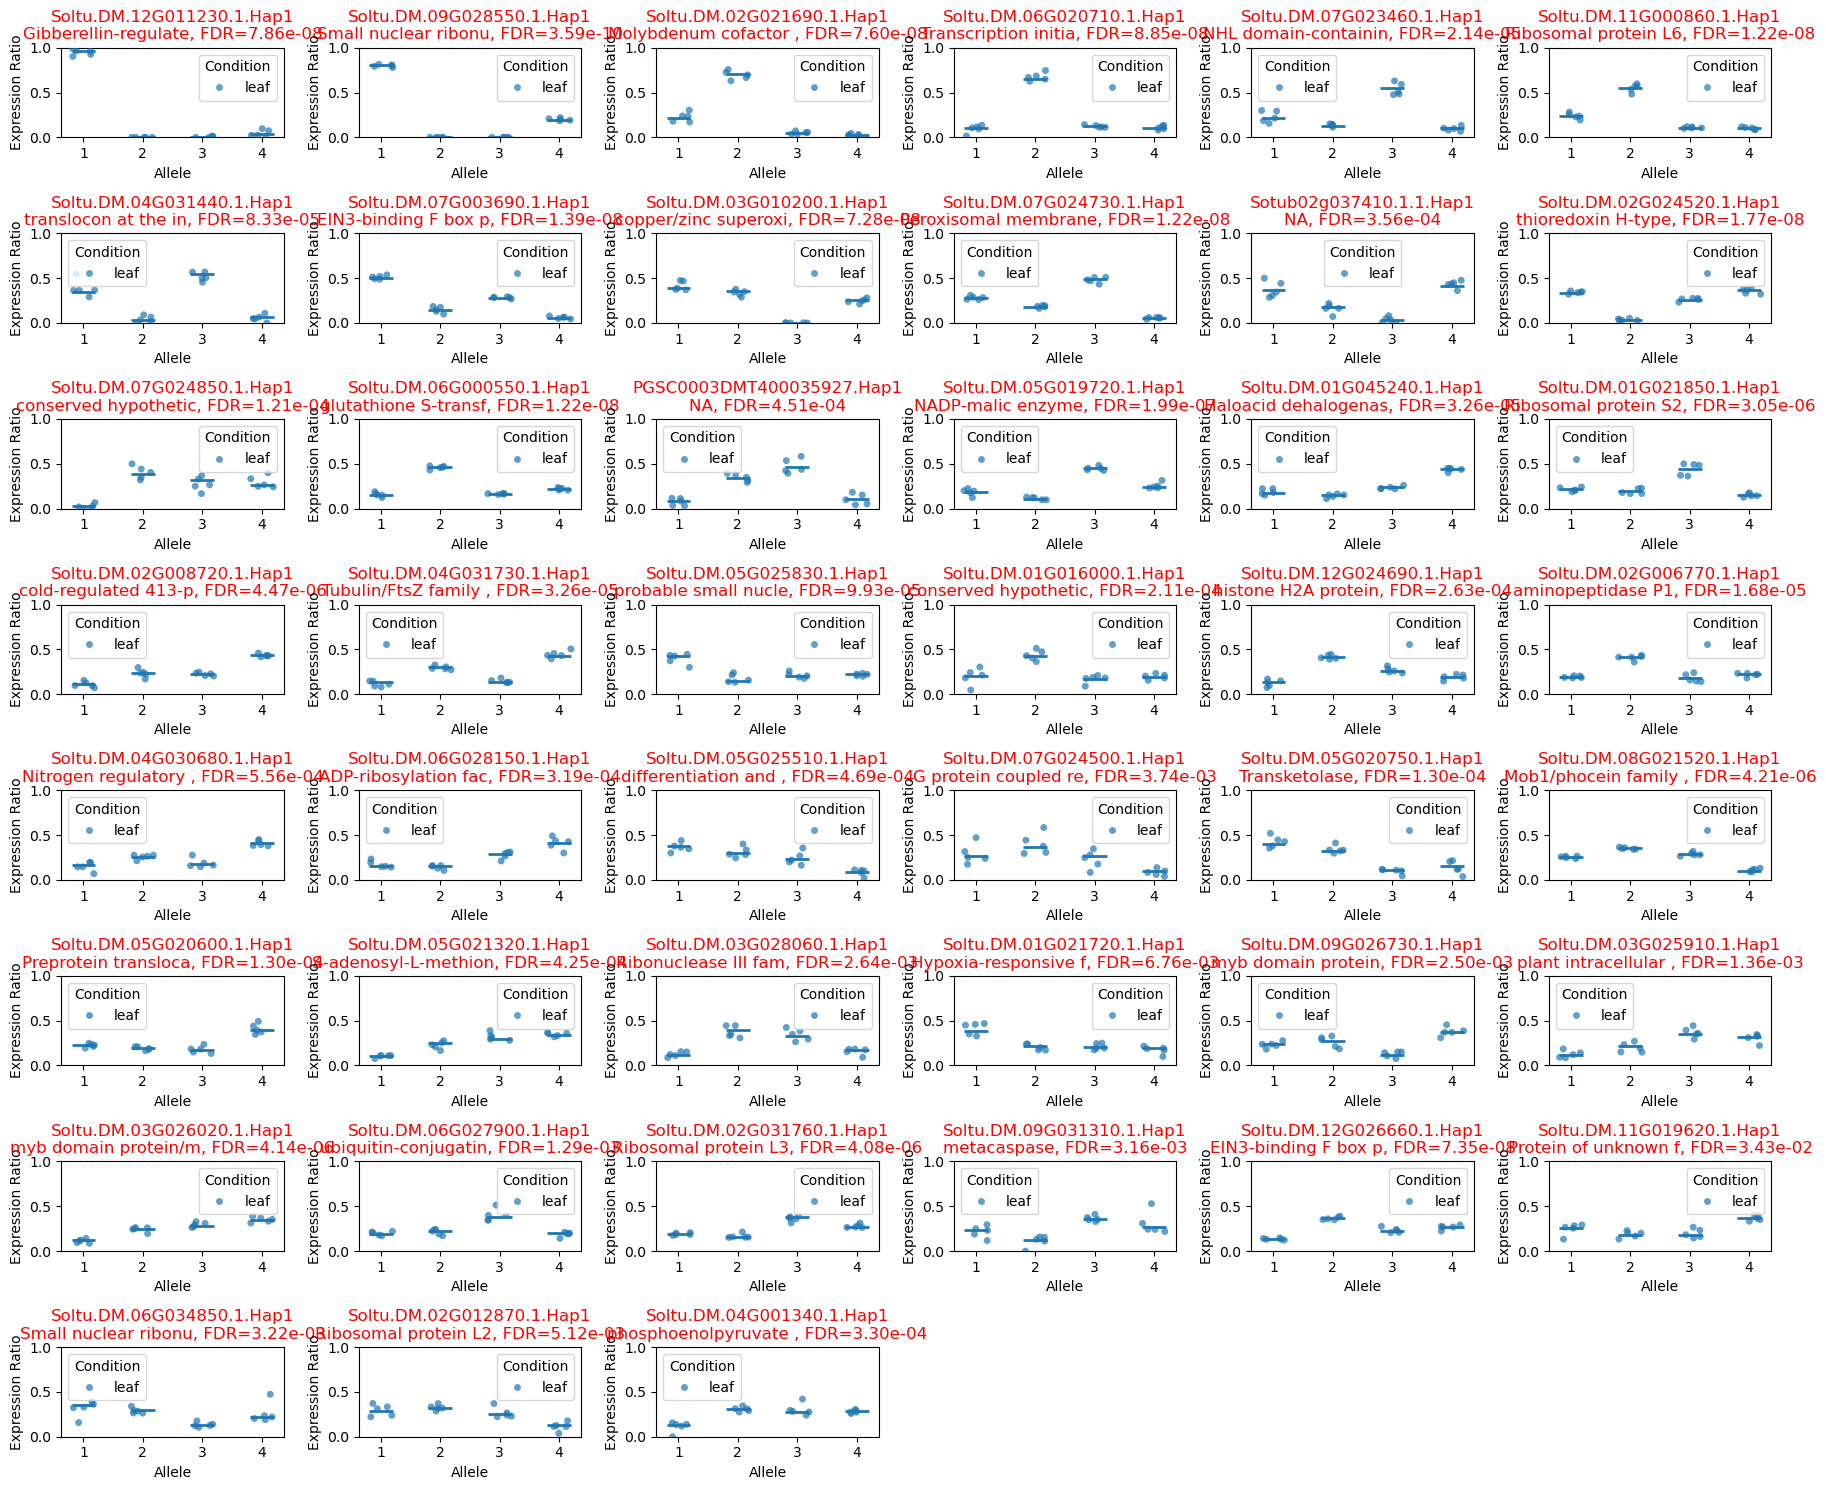

In [26]:
# 3. Plot the results
fig = plot_top_differential_syntelogs(cis_top_results, n = 50, figsize = (3*6, 5*3),sort_by='ratio_difference')
#cis_results_control.to_csv('/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/ASE_results/long_cis_results_control.tsv', sep='\t')


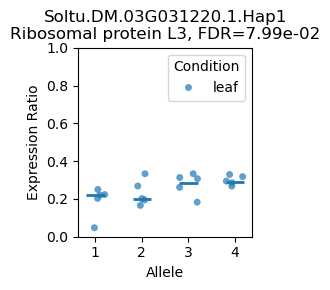

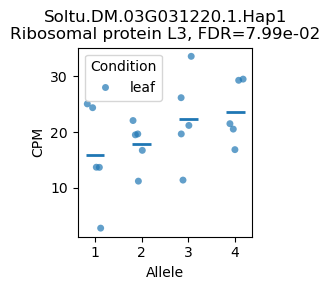

In [27]:
Synt_id = "Soltu.DM.03G031220"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['transcript_id'].str.contains(Synt_id)]
ax1 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (12, 3),sort_by='ratio_difference')
ax1.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_cis_{Synt_id}_ratio.svg" )
# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['transcript_id'].str.contains(Synt_id)]
ax2 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )
ax2.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_cis_{Synt_id}_cpm.svg" )

In [28]:
# # for transcript id split the hap and ./d.
# cis_results_control['transcript_id'] = cis_results_control['transcript_id'].apply(lambda x: x.rsplit('.', 2)[0] if isinstance(x, str) else x)
# cis_results_control.to_csv('/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/ASE_results/Atlantic_cis_results_control.tsv', sep='\t')

In [29]:
# plot shared gene between atlantic and desiree
Synt_id = "Synt_id_14709"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['Synt_id'] == Synt_id]
ax1 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (3*6, 3*1),sort_by='ratio_difference', )

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['Synt_id'] == Synt_id]
ax2 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (3*6, 3*1),sort_by='ratio_difference', plot_type='cpm' )

No results to plot
No results to plot


In [30]:
cis_top_results.sort_values(by='ratio_difference', ascending=False).head(10)

Synt_id allele                              functional_annotation  \
782  Synt_id_61039      1               Gibberellin-regulated family protein   
714  Synt_id_53205      1     Small nuclear ribonucleoprotein family protein   
128  Synt_id_19547      2       Molybdenum cofactor sulfurase family protein   
513  Synt_id_38524      2  Transcription initiation factor TFIIE, beta su...   
619  Synt_id_44216      3  NHL domain-containing protein/NHL domain-conta...   
752  Synt_id_56017      2                Ribosomal protein L6 family protein   
343  Synt_id_29640      3  translocon at the inner envelope membrane of c...   
580  Synt_id_40655      1                         EIN3-binding F box protein   
780  Synt_id_61039      2               Gibberellin-regulated family protein   
715  Synt_id_53205      2     Small nuclear ribonucleoprotein family protein   

                 transcript_id       p_value  ratio_difference  n_alleles  \
782  Soltu.DM.12G011230.1.Hap1  1.583583e-09          0.708127          4   
714  Soltu.DM.09G028550.1.Hap1  8.504921e-13          0.554549          4   
128  Soltu.DM.02G021690.1.Hap2  1.852746e-09          0.459085          4   
513  Soltu.DM.06G020710.1.Hap2  1.991406e-09          0.405387          4   
619  Soltu.DM.07G023460.1.Hap3  1.041398e-06          0.304181          4   
752  Soltu.DM.04G009150.1.Hap2  1.556468e-10          0.298395          4   
343  Soltu.DM.04G031440.1.Hap3  6.985333e-06          0.290263          4   
580  Soltu.DM.07G003690.1.Hap1  9.851128e-11          0.254485          4   
780  Soltu.DM.12G011230.1.Hap2  1.361385e-08          0.250952          4   
715  Soltu.DM.09G028550.1.Hap2  1.582958e-10          0.250369          4   

     ratios_leaf_mean                                    ratios_rep_leaf  \
782          0.959079  [0.9641025641025641, 0.9024390243902439, 0.925...   
714          0.804918  [0.8144611186903138, 0.7795275590551181, 0.792...   
128          0.708576  [0.7568627450980392, 0.6666666666666666, 0.631...   
513          0.656308  [0.6252821670428894, 0.746031746031746, 0.6691...   
619          0.552065  [0.6299435028248588, 0.48333333333333334, 0.47...   
752          0.548479  [0.5352526439482961, 0.5973813420621932, 0.569...   
343          0.544138  [0.5675675675675675, 0.45454545454545453, 0.5,...   
580          0.504506  [0.492987012987013, 0.5125348189415042, 0.5369...   
780          0.000000                          [0.0, 0.0, 0.0, 0.0, 0.0]   
715          0.000000                          [0.0, 0.0, 0.0, 0.0, 0.0]   

     cpm_leaf_mean                                       cpm_rep_leaf  \
782      38.496454  [28.815939260904997, 51.990096589168644, 38.03...   
714     120.295159  [91.5059347806398, 139.10863681966745, 124.750...   
128      69.434921  [59.164641248453876, 84.3082647391924, 58.5718...   
513      53.011777  [42.457527528035556, 66.04147404570071, 69.221...   
619      34.461765  [34.18060880415859, 40.74899462394299, 29.6662...   
752     469.355879  [418.9040531917732, 512.8752771634205, 495.198...   
343      13.030609  [12.875206903808616, 14.051377456532066, 8.367...   
580     199.070841  [145.45918275850448, 258.54534520019, 204.6212...   
780       0.000000                          [0.0, 0.0, 0.0, 0.0, 0.0]   
715       0.000000                          [0.0, 0.0, 0.0, 0.0, 0.0]   

              FDR  
782  7.862026e-08  
714  3.589077e-10  
128  8.687320e-08  
513  8.846035e-08  
619  2.143756e-05  
752  1.484463e-08  
343  9.826035e-05  
580  1.385725e-08  
780  5.202880e-07  
715  1.484463e-08

### Plot CPMs

In [31]:
grouped_results= cis_results_control.groupby('Synt_id').agg({
    'FDR': 'min',
    'ratio_difference': 'max' , # Assuming this is the correct column name
    'transcript_id': 'first'  # Concatenate transcript IDs
        })
# split the last prefix from transcript_id
grouped_results['gene_id'] = grouped_results['transcript_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)
    # Print summary
significant_results = grouped_results[(grouped_results['FDR'] < 0.05) & (grouped_results['ratio_difference'] > 0.1)]

unsignificant_results = grouped_results[(grouped_results['FDR'] >= 0.05) | (grouped_results['ratio_difference'] <= 0.1)]

# save only the gene_Id column to a tsv
#significant_results[['gene_id']].to_csv('unbalanced_syntelogs.tsv', sep='\t', index=False)

#grouped_results[['gene_id']].to_csv('all_syntelogs.tsv', sep='\t', index=False)

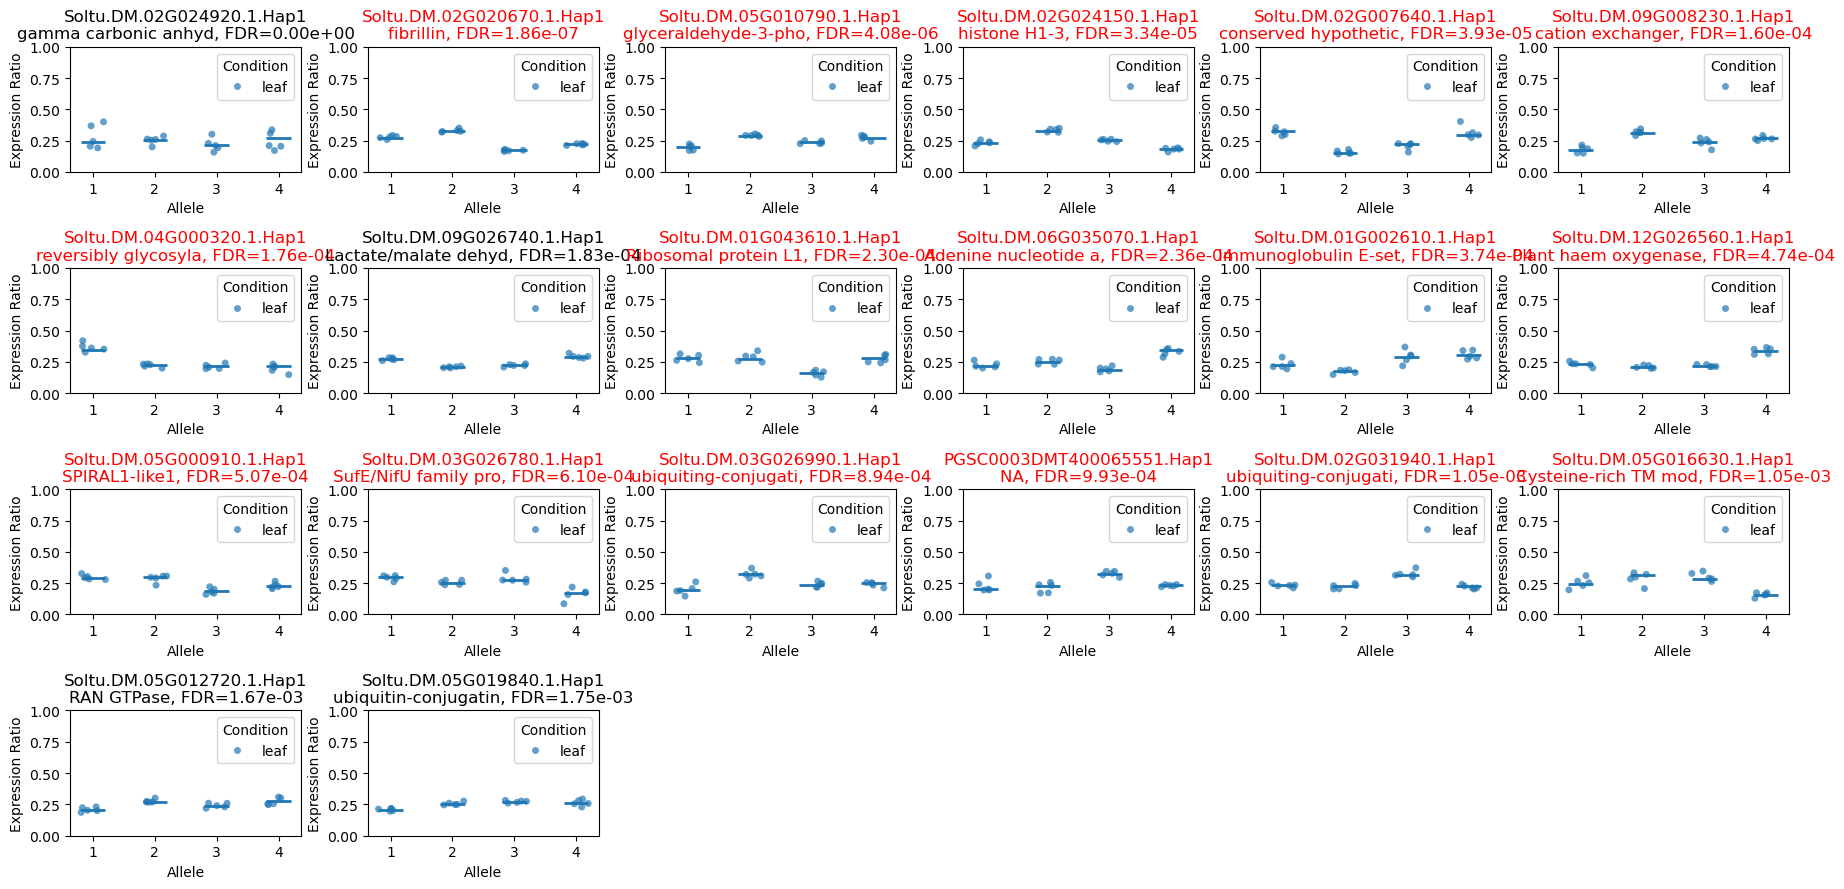

In [32]:
# Filter the syntelog results with balanced expression for plotting
mask = unsignificant_results.index
balanced_cis_results = cis_results_control[cis_results_control['Synt_id'].isin(unsignificant_results.index)]
fig = plot_top_differential_syntelogs(balanced_cis_results, n = 20, figsize = (3*6, 3*3), )

In [33]:
#cis_results_control.to_csv("/scratch/nadjafn/for_yuchao/Desiree_results/desiree_allelic_ratios_results_cpm.tsv", sep="\t")

Running Mercator did not lead to any overrepresentation https://www.plabipd.de/mercator_main.html

### Between conditions


In [34]:
# Filter to only include synteny category "1hap1_1hap2_1hap3_1hap4_s" 

mask = (allelic_data_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s")
allelic_data_syntelogs = allelic_data_filtered[:,mask].copy()

Using CPM data from layer: unique_cpm


Processing syntelog 100/697
Processing syntelog 200/697
Processing syntelog 300/697
Processing syntelog 400/697
Processing syntelog 500/697
Processing syntelog 600/697
Found 268 from 691 syntelogs with at least one significantly different allelic ratio (FDR < 0.05)


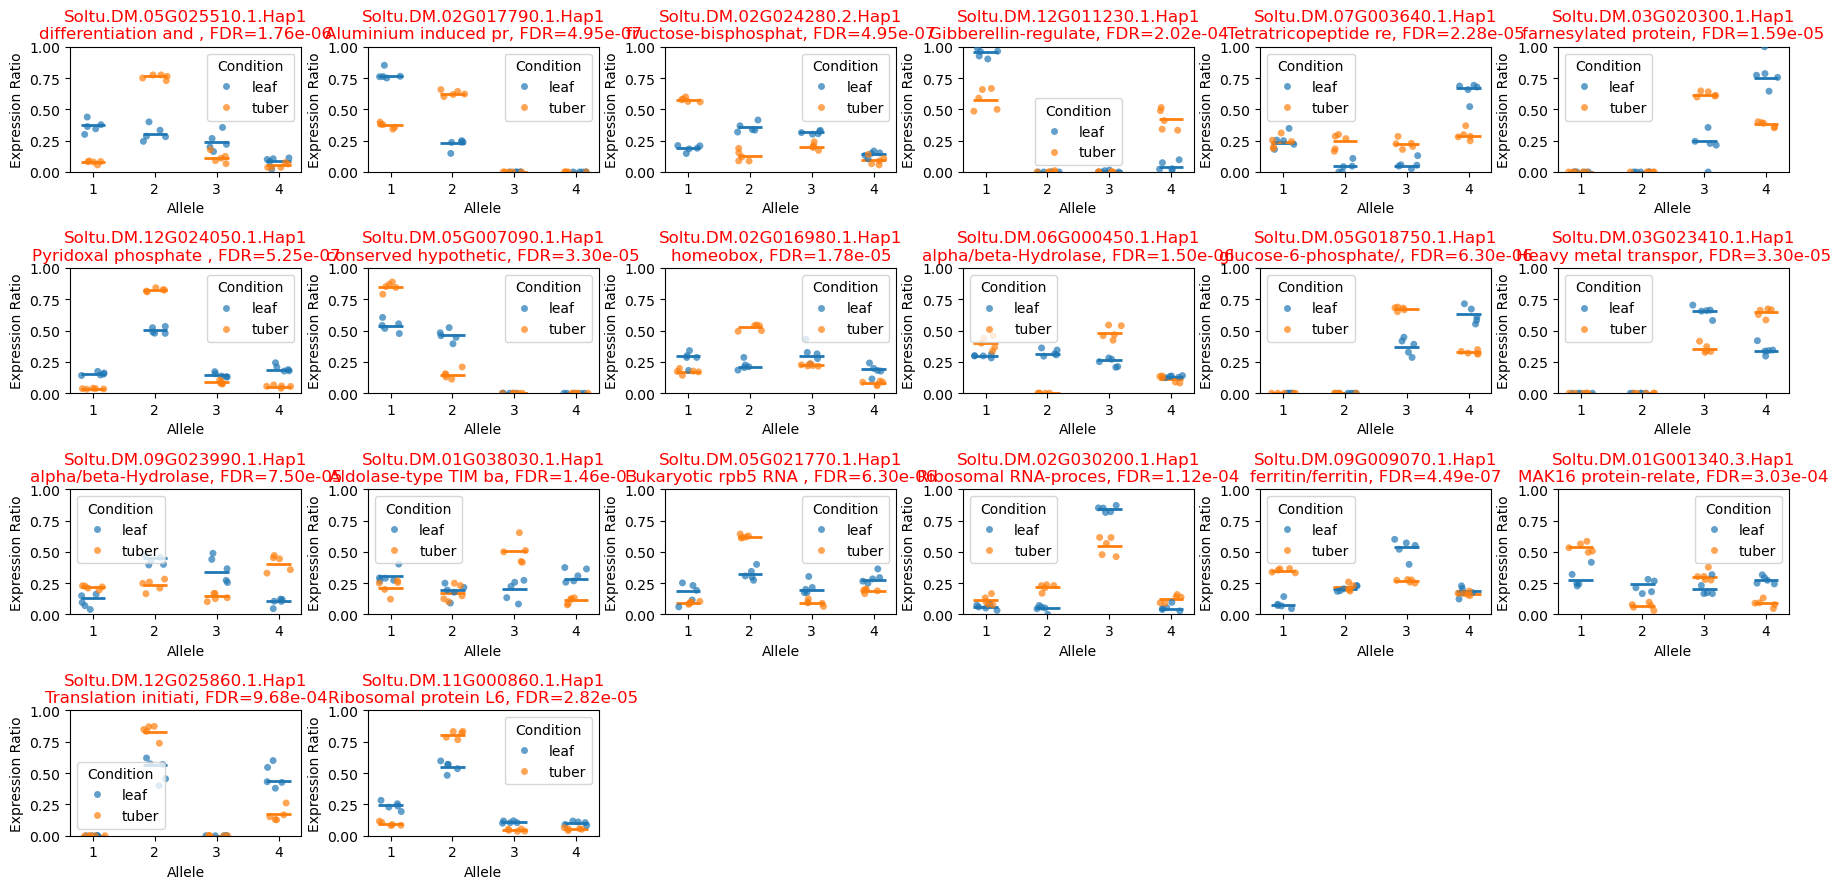

In [35]:
# 1. Run allelic ratio test
results_df_trans = test_allelic_ratios_between_conditions(allelic_data_syntelogs)

# 2. Get top differential syntelogs
top_results_trans = get_top_differential_syntelogs(results_df_trans, n=50, sort_by='ratio_difference', fdr_threshold=0.05)

# 3. Plot the results
#fig = plot_top_differential_syntelogs(top_results_trans,n = 46, figsize=(3*6, 4*3), sort_by='FDR')
#plt.show()
fig = plot_top_differential_syntelogs(top_results_trans, figsize=(6*3, 3*3), n = 20, difference_threshold=0.1, sort_by='ratio_difference', sig_threshold=0.05)


#### Plot Ribosomal protein L3

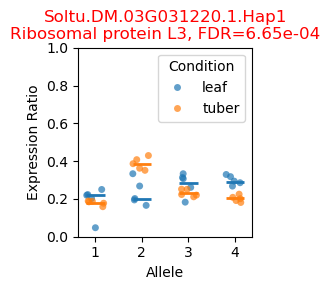

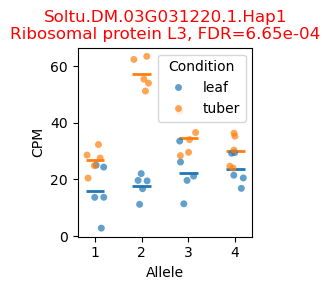

In [36]:
gene_id = "Soltu.DM.03G031220"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax1 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', )

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax2 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )
ax2.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_trans_{gene_id}_cpm.svg" )

##### Plot vacuolar ATP synthase subunit A

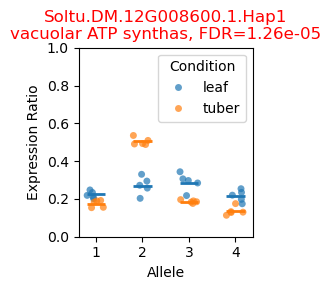

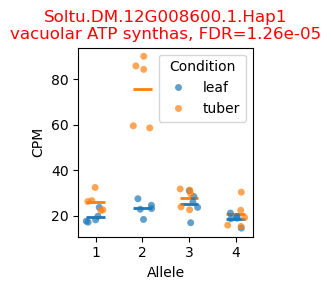

In [37]:
gene_id = "Soltu.DM.12G008600"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax1 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', )

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax2 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )
ax2.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_trans_{gene_id}_cpm.svg" )

In [38]:
top_results_trans['Unitato_gene_id'] = top_results_trans['gene_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)
# group by Synt_id and get the min FDR and max ratio_difference
top_results_trans_grouped = top_results_trans.groupby('Synt_id').agg({
    'FDR': 'min',
    'ratio_difference': list , # Assuming this is the correct
    'allele' : list,
    'gene_id': list,
    'Unitato_gene_id': 'first'  # Get unique gene IDs

})
# save the results to a tsv
# top_results_trans_grouped.to_csv('/scratch/nadjafn/LR_DESIREE_PAPER/AI_results/top_results_trans.tsv', sep='\t')


/tmp/ipykernel_328248/2973864598.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Isoform level analysis

In [39]:

# only keep the isoforms that have enghough gene-level read counts
allelic_data_filtered_isoform = allelic_data[:, allelic_data.var["gene_id"].isin(adata_gene_filtered.var["gene_id"])].copy()
# filter isoforms that have less 

In [40]:
allelic_data_filtered_isoform = calculate_allelic_ratios(allelic_data_filtered_isoform  , 'unique_counts' )
allelic_data_filtered_isoform = calculate_multi_ratios(allelic_data_filtered_isoform , 'unique_counts', 'ambiguous_counts')
allelic_data_filtered_isoform = calculate_per_allele_ratios(allelic_data_filtered_isoform, unique_layer='unique_counts', multi_layer='ambiguous_counts')

In [41]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask =  (allelic_data_filtered_isoform .var["multimapping_ratio_per_allele_weighted_average"] < 0.3) &  (allelic_data_filtered_isoform .var["transcript_multimapping_ratio"] < 0.3)
allelic_data_length_filter_isoform = allelic_data_filtered_isoform[:,mask].copy()

# 1. Test for differential allelic ratios withing conditions
DIU_results, DIU_plotting_result = test_isoform_DIU_between_conditions(allelic_data_length_filter_isoform, layer="unique_counts", inplace=True)



KeyError: 'multimapping_ratio_per_allele_weighted_average'

In [ ]:
ensembl_gtf_path = "/scratch/nadjafn/reference/Atlantic/unitato2Atl.with_chloroplast_and_mito.no_scaffold.agat.gtf"
annotation = RNApy.read_ensembl_gtf(ensembl_gtf_path)

# add the bambu annotations to the annotation dataframe
# with bambu
bambu = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff/gff/combined.fixed.gtf"
bambu_annotation = RNApy.read_ensembl_gtf(bambu)
bambu_annotation = bambu_annotation.filter(pl.col("transcript_id").str.contains("Bambu"))


annotation.extend(bambu_annotation)
annotation_df = annotation.to_pandas()
annotation_df['gene_id_unitato'] = annotation_df['gene_id'].str.rsplit('.', n=1).str[0]

annotation_function = pd.merge(annotation_df,df_annotation, how="left", on="gene_id_unitato")
# set Nan functional annotation to "No_annotation"
annotation_function['functional_annotation'] = annotation_function['functional_annotation'].fillna("No_annotation")
#annotation_function['gene_id'] = annotation_function['functional_annotation']
# back to polar
annotation_function = pl.from_pandas(annotation_function)

In [ ]:
figures = plot_differential_isoform_usage(
    results_df=DIU_plotting_result,
    annotation_df=annotation_function,
    fdr_threshold=0.05,
    ratio_difference_threshold=0.3
)

Detected layer: unique_counts (using column: unique_counts_cpm)
Found 8 genes with significant isoforms. Plotting all isoforms for these genes.
Processing gene: Soltu.DM.02G014130.Hap4


Processing gene: Soltu.DM.07G022010.Hap1
Skipping Soltu.DM.07G022010.Hap1 as it has only one transcript
Processing gene: Soltu.DM.07G022010.Hap3
Skipping Soltu.DM.07G022010.Hap3 as it has only one transcript
Processing gene: Soltu.DM.07G026360.Hap0


Processing gene: Soltu.DM.10G027570.Hap0


Processing gene: Soltu.DM.10G027570.Hap2


Processing gene: Soltu.DM.11G022220.Hap1


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.11G022220.3.Hap1. Only transcripts present in both will be returned.



Processing gene: Soltu.DM.11G023050.Hap1


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.11G023050.1.Hap1. Only transcripts present in both will be returned.



Generated 6 plots for differential isoform usage


##### By structutre

In [ ]:
# Step 1: First add exon structure information to your AnnData object
gtf_file = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff/gff/combined.fixed.gtf"

# Add structure information (this only needs to be done once)
add_structure_from_gtf(allelic_data_filtered_isoform , gtf_file, inplace=True, verbose=True)


Loading GTF file: /scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff/gff/combined.fixed.gtf
Processing exon structures...
Processed 250224 transcripts
Exon count distribution:
n_exons
1     70765
2     53581
3     32202
4     19639
5     14515
6     11146
7      9139
8      7440
9      6317
10     5105
Name: count, dtype: int64
Calculated introns for 179459 multi-exon transcripts
Intron count distribution:
n_introns
1     53581
2     32202
3     19639
4     14515
5     11146
6      9139
7      7440
8      6317
9      5105
10     3976
Name: count, dtype: int64
Adding structure information to AnnData.var...
Matched structure information for 4766/4766 transcripts
Successfully added exon structure information for 250224 transcripts
  - Intron structures calculated for multi-exon transcripts


In [ ]:
fig = plot_allele_specific_isoform_structure(results_DIU_plotting , annotation_df=annotation_function,ratio_difference_threshold=0.2)

Detected layer: isoform (using column: isoform_cpm)
Found 3 syntelogs with significant allelic differences. Plotting all isoforms for these syntelogs.
Processing Synt_id: Synt_id_35710
Gene: Soltu.DM.05G025890.Hap3


Processing Synt_id: Synt_id_59067
Gene: Soltu.DM.11G023050.Hap3


Processing Synt_id: Synt_id_38611
Gene: Soltu.DM.06G021330.Hap4


Generated 3 plots for allele-specific isoform structure
